In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from scipy.stats import skew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import binned_statistic

In [30]:
a = pd.read_csv('C:/Users/DELL/Desktop/round1/train.csv')
b = pd.read_csv('C:/Users/DELL/Desktop/round1/test.csv')

In [31]:
a.head()

,id,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Pressure
0,0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B,122.905
1,1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b,129.285
2,2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E,116.225
3,3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f,132.430
4,4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E,115.234


In [32]:
print(a.columns)
#col={'Attribute1':'hertz','Attribute2':'degree','Attribute3':'length-meter','Attribute4':'speed','Attribute5':'length2','Attribute6':'force1','Attribute7':'force2','Attribute8':'material','Attribute9':'pressure'}


Index(['id', 'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4',
       'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Pressure'],
      dtype='object')


In [33]:
a.rename(columns=col,inplace=True)

In [34]:
print(a.head())

   id   hertz  degree  length-meter  speed   length2  force1     force2  \
0   0   500.0     8.4        0.0508   39.6  0.005662   216.0   4.676385   
1   1  2000.0    15.4        0.0508   71.3  0.026427   149.0  34.469485   
2   2  3150.0    19.7        0.0508   71.3  0.034118   230.0  21.730041   
3   3  1000.0    11.2        0.0508   39.6  0.015048   156.0   6.997097   
4   4  2500.0    12.6        0.1524   71.3  0.048316   247.0  11.218947   

  material  Pressure  
0        B   122.905  
1        b   129.285  
2        E   116.225  
3        f   132.430  
4        E   115.234  


In [38]:
un=a['material'].unique()
print(a.shape)

(1052, 10)


In [39]:
print(un)

['B' 'b' 'E' 'f' 'D' 'F' 'c' 'a' 'A' 'C' nan 'e' 'd']


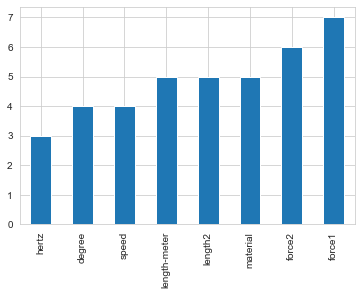

In [41]:
# first we'll visualize null count
null_in_train_csv = a.isnull().sum()
null_in_train_csv = null_in_train_csv[null_in_train_csv > 0]
null_in_train_csv.sort_values(inplace=True)
null_in_train_csv.plot.bar()

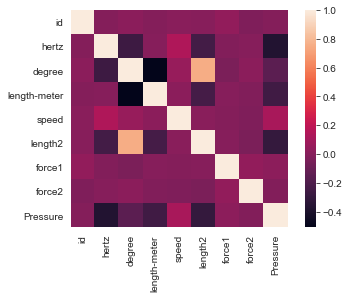

In [43]:
sns.heatmap(a.corr(), vmax=1, square=True);


In [45]:
arr_train_cor = a.corr()['Pressure']
#idx_train_cor_gt0 = arr_train_cor[arr_train_cor > 0].sort_values(ascending=False).index.tolist()
print("How many feature candidates have positive correlation with SalePrice(including itself)? %d" % len(arr_train_cor))

How many feature candidates have positive correlation with SalePrice(including itself)? 9


In [46]:
print(arr_train_cor)

id             -0.002573
hertz          -0.373921
degree         -0.150384
length-meter   -0.255108
speed           0.116905
length2        -0.298585
force1          0.024099
force2         -0.013240
Pressure        1.000000
Name: Pressure, dtype: float64


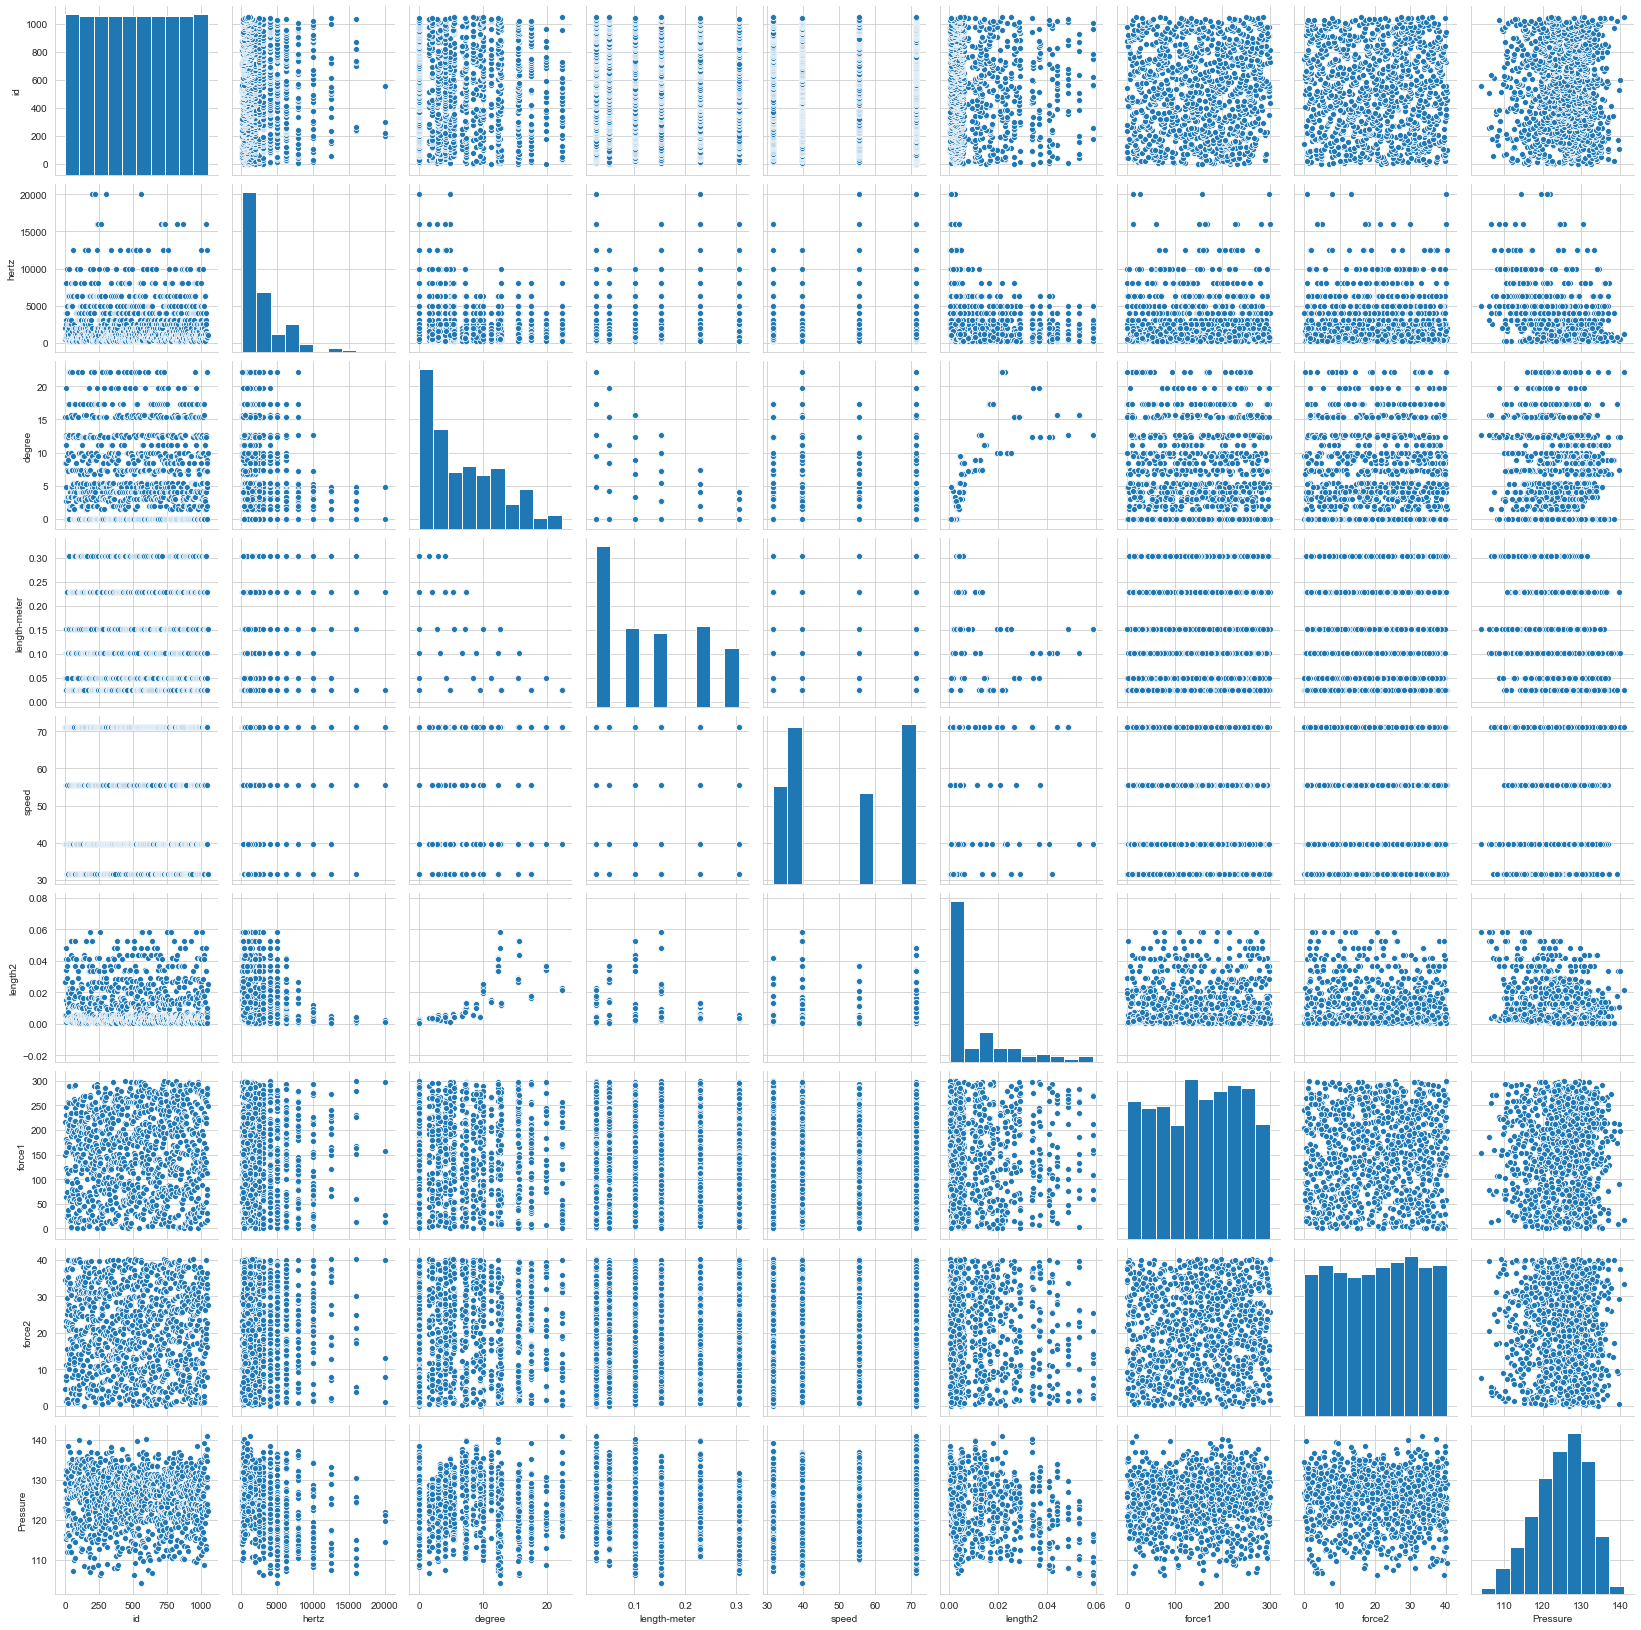

In [47]:
sns.pairplot(a)

In [61]:
un=a['id'].unique()
print(un.shape)
a_rem_id=a.drop("id",axis=1)
print(a_rem_id.shape)

(1052,)
(1052, 9)


In [63]:
a_rem_id.head()

,hertz,degree,length-meter,speed,length2,force1,force2,material,Pressure
0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,B,122.905
1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,b,129.285
2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,E,116.225
3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,f,132.430
4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,E,115.234


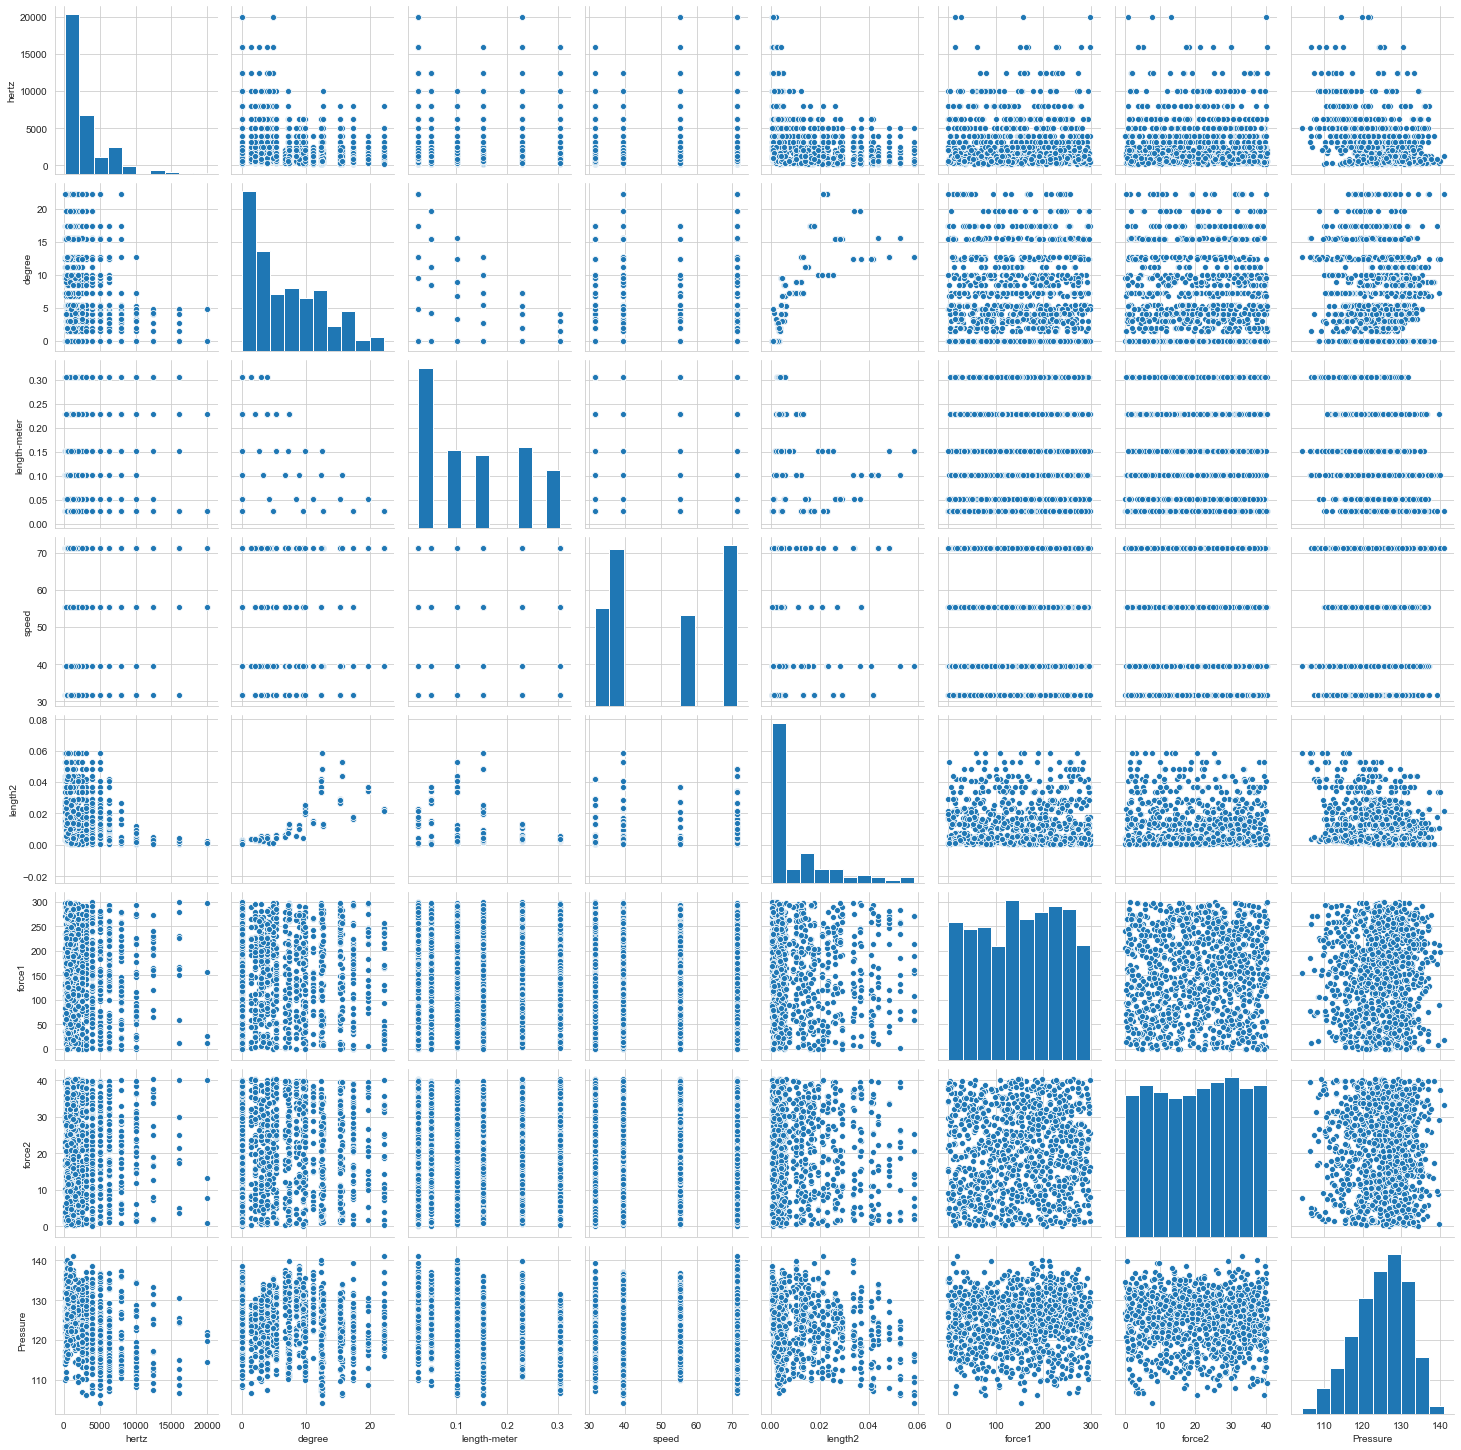

In [65]:
sns.pairplot(a_rem_id)

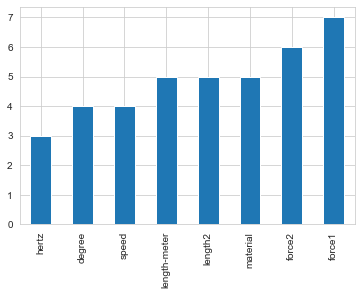

In [66]:
# first we'll visualize null count
null_in_train_csv = a.isnull().sum()
null_in_train_csv = null_in_train_csv[null_in_train_csv > 0]
null_in_train_csv.sort_values(inplace=True)
null_in_train_csv.plot.bar()
#null_in_masvnrarea = a_rem_id[a_rem_id['MasVnrArea'].isnull()].index.tolist()


In [72]:
arr_train_cor = a_rem_id.corr()['length2']
print(arr_train_cor)

hertz          -0.240258
degree          0.756474
length-meter   -0.234490
speed           0.011463
length2         1.000000
force1          0.001223
force2         -0.037858
Pressure       -0.298585
Name: length2, dtype: float64


In [75]:
a_rem_id['hertz']=a_rem_id['hertz'].fillna(method='ffill')
a_rem_id['degree']=a_rem_id['degree'].fillna(method='ffill')
a_rem_id['speed']=a_rem_id['speed'].fillna(method='ffill')
a_rem_id['length-meter']=a_rem_id['length-meter'].fillna(method='ffill')
a_rem_id['length2']=a_rem_id['length2'].fillna(method='ffill')
a_rem_id['material']=a_rem_id['material'].fillna(method='ffill')
a_rem_id['force2']=a_rem_id['force2'].fillna(method='ffill')
a_rem_id['force1']=a_rem_id['force1'].fillna(method='ffill')

In [77]:
null_in_train_csv = a_rem_id.isnull().sum()
print(null_in_train_csv)

hertz           0
degree          0
length-meter    0
speed           0
length2         0
force1          0
force2          0
material        0
Pressure        0
dtype: int64


In [80]:
dummy_fields = ['material']
train_dist = a_rem_id.drop("material",axis=1)
for field in dummy_fields:
    dummies = pd.get_dummies(a_rem_id.loc[:, field], prefix=field)
    train_dist = pd.concat([train_dist, dummies], axis = 1)
train_dist.head()

,hertz,degree,length-meter,speed,length2,force1,force2,Pressure,material_A,material_B,material_C,material_D,material_E,material_F,material_a,material_b,material_c,material_d,material_e,material_f
0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,122.905,0,1,0,0,0,0,0,0,0,0,0,0
1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,129.285,0,0,0,0,0,0,0,1,0,0,0,0
2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,116.225,0,0,0,0,1,0,0,0,0,0,0,0
3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,132.430,0,0,0,0,0,0,0,0,0,0,0,1
4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,115.234,0,0,0,0,1,0,0,0,0,0,0,0


In [114]:
arr_train_cor = train_dist.corr()['Pressure']
print(arr_train_cor)

hertz          -0.371574
degree         -0.150709
length-meter   -0.255653
speed           0.114209
length2        -0.296104
force1          0.022493
force2         -0.011282
Pressure        1.000000
material_A     -0.014651
material_B      0.014540
material_C      0.002077
material_D     -0.003638
material_E      0.028412
material_F      0.011283
material_a      0.046676
material_b      0.000763
material_c     -0.015283
material_d     -0.007447
material_e     -0.017312
material_f     -0.044500
Name: Pressure, dtype: float64


In [92]:
y_train=train_dist['Pressure']
x_train = train_dist.drop("Pressure",axis=1)
x_train.head(5)
#y_train.head(5)

,hertz,degree,length-meter,speed,length2,force1,force2,material_A,material_B,material_C,material_D,material_E,material_F,material_a,material_b,material_c,material_d,material_e,material_f
0,500.0,8.4,0.0508,39.6,0.005662,216.0,4.676385,0,1,0,0,0,0,0,0,0,0,0,0
1,2000.0,15.4,0.0508,71.3,0.026427,149.0,34.469485,0,0,0,0,0,0,0,1,0,0,0,0
2,3150.0,19.7,0.0508,71.3,0.034118,230.0,21.730041,0,0,0,0,1,0,0,0,0,0,0,0
3,1000.0,11.2,0.0508,39.6,0.015048,156.0,6.997097,0,0,0,0,0,0,0,0,0,0,0,1
4,2500.0,12.6,0.1524,71.3,0.048316,247.0,11.218947,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
from scipy.stats import skew
print("Skewness before log transform: ", y_train.skew())
print("Kurtosis before log transform: ",y_train.kurt())

Skewness before log transform:  -0.38368117098689075
Kurtosis before log transform:  -0.40475818342506686


In [104]:
def draw2by2log(arr):
    fig = plt.figure();
    plt.subplot(2,2,1)
    sns.distplot(arr, fit=norm);
    plt.subplot(2,2,3)
    stats.probplot(arr, plot=plt);
    plt.subplot(2,2,2)
    sns.distplot(np.log(arr), fit=norm);
    plt.subplot(2,2,4)
    stats.probplot(np.log(arr), plot=plt);

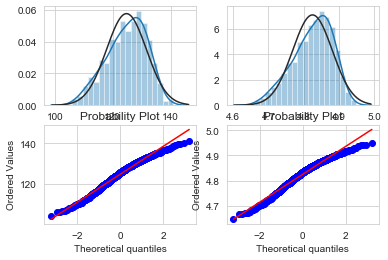

In [106]:
draw2by2log(y_train)


RMSE for Linear Regression Model in sklearn: 4.99


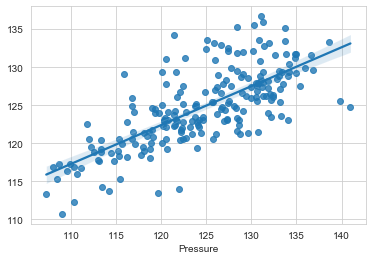

In [113]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))
xt_train, xt_test, yt_train, yt_test = train_test_split(x_train, y_train, test_size=.2, random_state=7)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xt_train, yt_train)
yd_lm = lm.predict(xt_test)
rmse_linear = rmse(yt_test, yd_lm)
sns.regplot(yt_test, yd_lm)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear)